In [1]:
from env import my_setup

In [2]:
my_setup()


import os
from pydataset import data
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as m
from env import gdb
from env import Percent
    


In [3]:
import os
from pydataset import data
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as m
from scipy import stats
from env import gdb
from env import Percent

# Exercises
Do your work for this exercise in a jupyter notebook named `hypothesis_testing.ipynb`.

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

- Has the network latency gone up since we switched internet service providers?

In [ ]:
Hₒ = The latency is the same from ISPₒ and ISPᵦ
Hₐ = The Latency has changed from ISPₒ and ISPᵦ

- Is the website redesign any good?

In [ ]:
Hₒ = The Websiteₙ is creating no different user engagement than Websiteₒ
Hₐ = The Websiteₙ is creating a different user engagement metric than Websiteₒ

- Is our television ad driving more sales?

In [ ]:
Hₒ = Average sales for this time of year follows the established model with no statistical difference
Hₐ = Average sales for this time of year are different from the established model

# Exercises - Section II - T-Testing
Continue working in your `hypothesis_testing` notebook.

- Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

### Setting the Hypotheses

  * $H{0}$: There is no difference in the means of the time it takes to sell homes in office #1 vs #2
  
  * $H{a}$: The average time it takes to sell a home in office #1 and #2 are different.

In [4]:
α = .05
μᵢ, σᵢ, nobsᵢ = 90, 15, 40
μⱼ, σⱼ, nobsⱼ = 100, 20, 50
stats.ttest_ind_from_stats(μᵢ, σᵢ, nobsᵢ, μⱼ, σⱼ, nobsⱼ)


Ttest_indResult(statistic=-2.6252287036468456, pvalue=0.01020985244923939)

In [6]:
stats.ttest_ind_from_stats(μⱼ, σⱼ, nobsⱼ, μᵢ, σᵢ, nobsᵢ)

Ttest_indResult(statistic=2.6252287036468456, pvalue=0.01020985244923939)

In [98]:
t , p = stats.ttest_ind_from_stats(μⱼ, σⱼ, nobsⱼ, μᵢ, σᵢ, nobsᵢ)

In [99]:
if (p < α):
    print('We can REJECT the Null Hypothesis')
else:
    print('We CANNOT reject the Null Hypothesis')

We can REJECT the Null Hypothesis


- Load the mpg dataset and use it to answer the following questions:

In [8]:
mpg = sns.load_dataset('mpg')
mpg.model_year.unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

In [9]:
data('mpg', show_doc='True')

mpg

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Fuel economy data from 1999 and 2008 for 38 popular models of car

### Description

This dataset contains a subset of the fuel economy data that the EPA makes
available on http://fueleconomy.gov. It contains only models which had a new
release every year between 1999 and 2008 - this was used as a proxy for the
popularity of the car.

### Usage

    data(mpg)

### Format

A data frame with 234 rows and 11 variables

### Details

  * manufacturer. 

  * model. 

  * displ. engine displacement, in litres 

  * year. 

  * cyl. number of cylinders 

  * trans. type of transmission 

  * drv. f = front-wheel drive, r = rear wheel drive, 4 = 4wd 

  * cty. city miles per gallon 

  * hwy. highway miles per gallon 

  * fl. 

  * class. 




In [11]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

**Set the _Hypothesis_:**

  * $H_{0}$: The average fuel efficiency of cars from 2008 == The average fuel efficiency of cars from 1999
  
  * $H_{a}$: The average fuel efficiency of cars from 2008 != The avaerage fuel efficiency of cars from 1999

In [12]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [16]:
type(mpg)

pandas.core.frame.DataFrame

In [21]:
oh_eight_fuel = mpg[['cty', 'hwy']][mpg.year == 2008]
# oh_eight_fuel = mpg[mpg.year == 2008]['cty', 'hwy']
# 
ninety_nine_fuel = mpg[['cty', 'hwy']][mpg.year == 1999]


In [24]:
len(oh_eight_fuel), len(ninety_nine_fuel)

(117, 117)

In [26]:
av_oh_eight_fuel = (oh_eight_fuel.cty * .55) + (oh_eight_fuel.hwy * .45)

In [28]:
av_oh_eight_fuel.head()

3     24.95
4     25.05
7     22.05
10    23.60
11    22.60
dtype: float64

In [29]:
av_ninety_nine_fuel = (ninety_nine_fuel.cty * .55) + (ninety_nine_fuel.hwy * .45)

<AxesSubplot:>

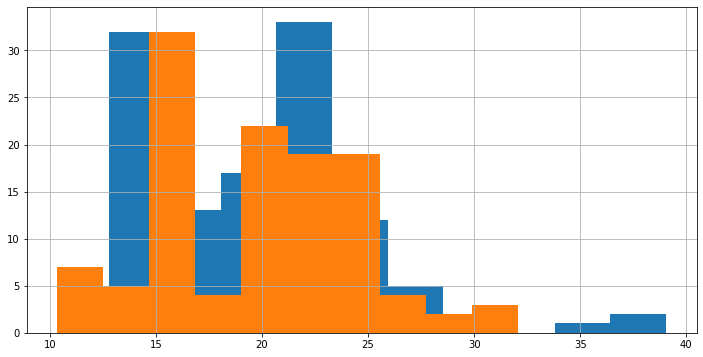

In [31]:
plt.figure(figsize=(12,6))
av_ninety_nine_fuel.hist()
av_oh_eight_fuel.hist()

In [32]:
# we are using a two-sample ttest because the samples are independent and of sufficient size CLT
# lets use the levene to see if the varience is equal or not...
stats.levene(av_oh_eight_fuel, av_ninety_nine_fuel, center='mean')

LeveneResult(statistic=0.013979152127153255, pvalue=0.9059849780909971)

In [ ]:
# The very low tstat and pvalue near 1 means the varience is very simular

In [34]:
t, p = stats.ttest_ind(av_oh_eight_fuel, av_ninety_nine_fuel)

In [35]:
if (p < α):
    print('We can REJECT the null Hypothesis')
else:
    print('We CANNOT reject the null Hypothesis')

We CANNOT reject the null Hypothesis


- Are compact cars more fuel-efficient than the average car?

**Let's set the _Hypotheses_**

 * $H_{0}$: Compact cars average fuel efficiency <= average fuel efficiency for cars
 
 * $H_{a}$: Compact cars average fuel efficiency > average fuel efficiency for cars
 
   * for this we will use a single sample ttest with 1 tails

In [46]:
# first lets set up our arrays
mpg['class'].unique()

compact_fuel_efficiency = mpg[['cty', 'hwy']][mpg['class'] == 'compact']
all_fuel_efficiency = mpg[['cty', 'hwy']]

In [49]:
av_compact_fuel_efficiency = compact_fuel_efficiency.cty * .55 + compact_fuel_efficiency.hwy * .45
av_all_fuel_efficiency = mpg.cty * .55 + mpg.hwy * .45

In [53]:
t, p = stats.ttest_1samp(av_compact_fuel_efficiency, av_all_fuel_efficiency.mean())

In [55]:
if (t > 0) and ((p/2) < α):
    print('We can REJECT the Null Hypothesis')
else:
    print('We CANNOT reject the Null Hypothesis')

We can REJECT the Null Hypothesis


- Do manual cars get better gas mileage than automatic cars?

### Let's look at manual vs automatic cars...
##### Do manual cars get better gass milage than automatic cars?

 * $H_{0}$: Average Gas mileage of manual cars <= Average Gas Mileage of automatic cars
 
 * $H_{a}$: Average gas mileage of manual cars > Average gas mileage of automatic cars
 \n\n
   * This will be a 2-sample ttest with one tail and we will test the varience before running it

In [56]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [72]:
# mpg.trans = mpg.trans.replace('(15)','', regex=True)

In [76]:
# mpg.trans = mpg.trans.apply(lambda x: x.replace('(15)',''))
mpg.trans = mpg.trans.str.replace(r'\(.*?\)', '', regex=True)

In [79]:
mpg['avg_mpg'] = mpg.cty * .55 + mpg.hwy * .45

In [82]:
manual_avg_mpg = mpg.avg_mpg[mpg.trans == 'manual']
auto_avg_mpg = mpg.avg_mpg[mpg.trans == 'auto']

In [84]:
len(auto_avg_mpg) + len(manual_avg_mpg) == len(mpg)

True

<AxesSubplot:>

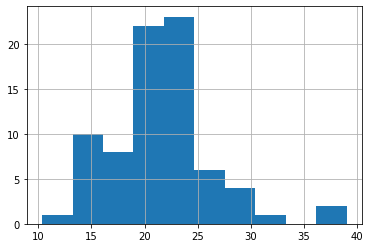

In [91]:
manual_avg_mpg.hist()

<AxesSubplot:>

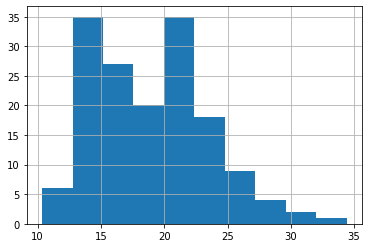

In [92]:
auto_avg_mpg.hist()

In [85]:
# Verified that these are independent smaples
# Now let's check the varience
stats.levene(manual_avg_mpg, auto_avg_mpg)

LeveneResult(statistic=0.12914686962840874, pvalue=0.7196451122833001)

In [86]:
# <!-- with a very low tstat and pvalue approaching 1 we can say that the varience is simular -->

In [95]:
stats.ttest_ind(manual_avg_mpg, auto_avg_mpg, alternative='greater')

Ttest_indResult(statistic=4.615440431437591, pvalue=3.247026140700206e-06)

In [96]:
t, p = stats.ttest_ind(manual_avg_mpg, auto_avg_mpg)

In [97]:
if (t > 0) and ((p / 2) < α):
    print('We can REJECT the Null Hypothesis')
else:
    print('We CANNOT reject the Null Hypothesis')

We can REJECT the Null Hypothesis


# Exercises - Section III - Correlation
Continue working in your `hypothesis_testing` notebook.

1. Use the `telco_churn` data. 

In [100]:
telco_churn = pd.read_csv('telco_churn.csv')

  * Does tenure correlate with monthly charges? 

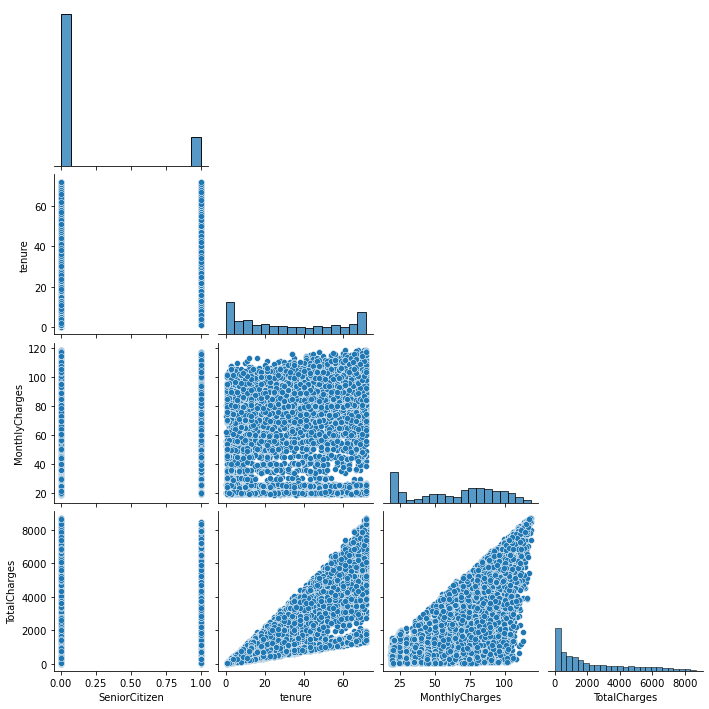

In [101]:
sns.pairplot(telco_churn, corner = True)

In [102]:
telco_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [103]:
telco_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Set the _Hypotheses_**

  * $H_{0}$: There is no correlation between tenure and MonthlyCharges
  * $H_{alt}$: There is a corelation between tenure and MonthlyCharges

In [104]:
x = telco_churn.tenure
y = telco_churn.MonthlyCharges

corr, p = stats.pearsonr(x, y)
corr, p

(0.2478998562861525, 4.094044991483017e-99)

In [ ]:
# There seems to be a very high confidence that 
# tenure and MonthlyCharges have a 25% correlation
# Why does this make sense? 
# Maybe the longer a customer's tenure the more average add_on services they have gotten? 
# This bears further investigation

  * Total charges? 

**Set the _Hypotheses_**

  * $H_{0}$: There is no correlation between tenure and total charges
  * $H_{alt}$: There is a correlation betweem tenure and total charges

In [106]:
telco_churn.TotalCharges.info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


In [107]:
x = telco_churn.tenure[telco_churn.TotalCharges > 0]
y = telco_churn.TotalCharges[telco_churn.TotalCharges > 0]

corr, p = stats.pearsonr(x, y)
corr, p

(0.8258804609332093, 0.0)

In [108]:
print(f'With a p-value = {p} and a correlation of {Percent(corr)} we can REJECT the Null Hypothesis')

With a p-value = 0.0 and a correlation of 82.59% we can REJECT the Null Hypothesis


#### Why Might this be?
  * If we think about the accumulation of charges over time,   
    the main reason Total Charges goes up, is because it can only go up or stop   
    if it stops completely, the tenure number will also stop going up
    
    *  interestingly though, some of the customers with longer tenure   
       do have smaller TotalCharges than some customers with shorter tenure
          
          ...Some longer tenure customers have phone service but no internet?!

  * What happens if you control for phone and internet service?

In [117]:
telco_churn.PhoneService.value_counts()#.unique()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [116]:
telco_churn.InternetService.value_counts()#.unique()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [119]:
# Let's take a look at customers that have internet regardless of whether they have phone service or not
internet_cust = telco_churn[['tenure', 'TotalCharges']]\
[(telco_churn.InternetService != 'No') & (telco_churn.TotalCharges > 0)]

internet_cust

,tenure,TotalCharges
0,1,29.85
1,34,1889.50
2,2,108.15
3,45,1840.75
4,2,151.65
...,...,...
7038,24,1990.50
7039,72,7362.90
7040,11,346.45
7041,4,306.60


In [120]:
x = internet_cust.tenure
y = internet_cust.TotalCharges

corr , p = stats.pearsonr(x, y)
corr, p

(0.931934618741812, 0.0)

In [121]:
print(f'By removing the customers that don\'t have internet we get a {Percent(corr)} Correlation between tenure and TotalCharges')

By removing the customers that don't have internet we get a 93.19% Correlation between tenure and TotalCharges


In [124]:
phone_cust_no_internet = telco_churn[['tenure', 'TotalCharges']]\
[(telco_churn.InternetService == 'No') & (telco_churn.TotalCharges > 0) & (telco_churn.PhoneService == 'Yes')]
phone_cust_no_internet

,tenure,TotalCharges
11,16,326.80
16,52,1022.95
21,12,202.25
22,1,20.15
33,1,20.20
...,...,...
7017,51,1020.75
7019,39,826.00
7020,12,239.00
7030,2,39.25


In [125]:
x = phone_cust_no_internet.tenure
y = phone_cust_no_internet.TotalCharges

corr, p = stats.pearsonr(x, y)
corr, p

(0.9814648859044293, 0.0)

In [126]:
# For phone customers only, the correlation goes up to 98%

In [140]:
dsl_cust = telco_churn[['tenure', 'TotalCharges', 'PhoneService']]\
[(telco_churn.InternetService == 'DSL') & (telco_churn.TotalCharges > 0)]# & (telco_churn.PhoneService == 'Yes')]
dsl_cust

,tenure,TotalCharges,PhoneService
0,1,29.85,No
1,34,1889.50,Yes
2,2,108.15,Yes
3,45,1840.75,No
7,10,301.90,No
...,...,...,...
7029,6,263.05,No
7031,55,3316.10,Yes
7036,12,743.30,No
7038,24,1990.50,Yes


In [138]:
fiber_cust = telco_churn[['tenure', 'TotalCharges', 'PhoneService']]\
[(telco_churn.InternetService == 'Fiber optic') & (telco_churn.TotalCharges > 0)]
fiber_cust

,tenure,TotalCharges,PhoneService
4,2,151.65,Yes
5,8,820.50,Yes
6,22,1949.40,Yes
8,28,3046.05,Yes
12,58,5681.10,Yes
...,...,...,...
7034,67,6886.25,Yes
7035,19,1495.10,Yes
7039,72,7362.90,Yes
7041,4,306.60,Yes


In [129]:
x = dsl_cust.tenure
y = dsl_cust.TotalCharges

corr, p = stats.pearsonr(x, y)
corr, p

(0.9411848215629796, 0.0)

In [130]:
x = fiber_cust.tenure
y = fiber_cust.TotalCharges

corr, p = stats.pearsonr(x, y)
corr, p

(0.9853093528070652, 0.0)

Text(0.5, 1.0, 'The Tenure vs the Total Charges of DSL Customers')

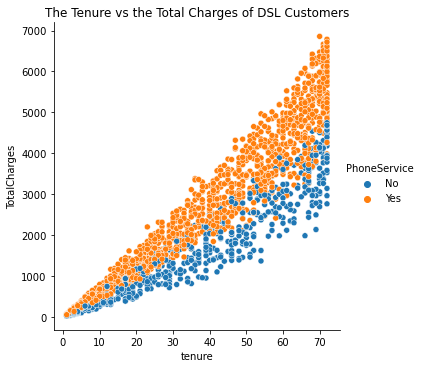

In [141]:
sns.relplot(x=dsl_cust.tenure, y=dsl_cust.TotalCharges, hue=dsl_cust.PhoneService)
plt.title('The Tenure vs the Total Charges of DSL Customers')

Text(0.5, 1.0, 'The Tenure vs the Total Charges of Fiber Customers')

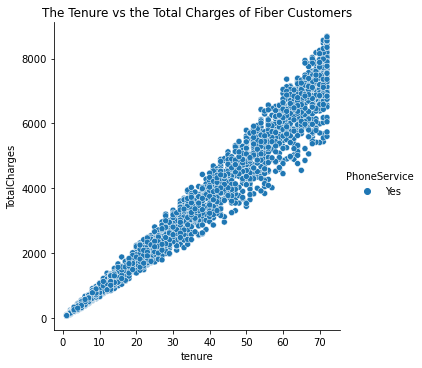

In [139]:
sns.relplot(x=fiber_cust.tenure, y=fiber_cust.TotalCharges, hue=fiber_cust.PhoneService)
plt.title('The Tenure vs the Total Charges of Fiber Customers')

In [142]:
phone_with_internet_options = telco_churn[(telco_churn.TotalCharges > 0) & (telco_churn.MonthlyCharges > 0)]

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1440x1440 with 0 Axes>

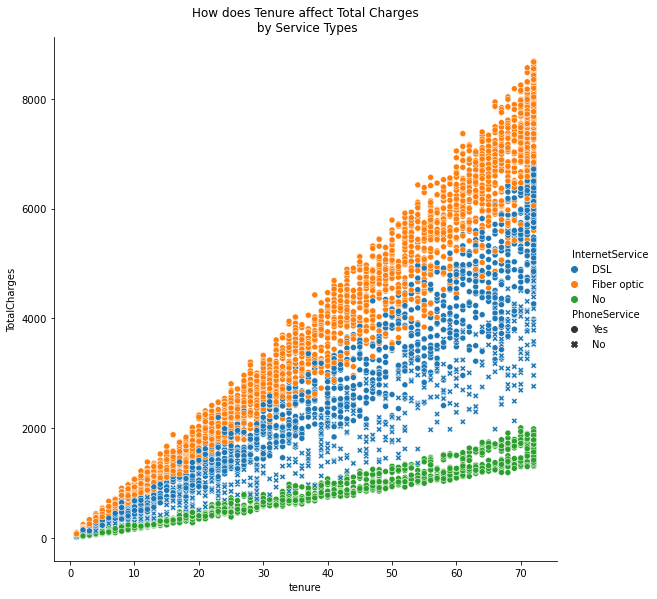

In [154]:
plt.figure(figsize=(20,20))
sns.relplot(x=phone_with_internet_options.tenure,
            y = phone_with_internet_options.TotalCharges, 
            hue = phone_with_internet_options.InternetService, 
            style = phone_with_internet_options.PhoneService,
            height = 8,
            style_order=['Yes', 'No']
           )
plt.title(f'How does Tenure affect Total Charges\n by Service Types')
plt.show

2. Use the employees database.

  * Is there a relationship between how long an employee has been with the company and their salary?

  * Is there a relationship between how long an employee has been with the company and the number of titles they have had?

3. Use the sleepstudy data. Is there a relationship between days and reaction time?